

# Análisis Completo de Regresión Lineal

Este notebook muestra paso a paso cómo realizar un análisis de **Regresión Lineal** empleando un conjunto de datos que contiene:
- **valuationdate**: fecha de valoración (opcional para el modelo)
- **revenues**: ingresos
- **ebit**: utilidad antes de intereses e impuestos
- **depreciation**: depreciación
- **capex**: gastos de capital
- **ncwc**: cambio en capital de trabajo neto
- **bv**: (posiblemente) valor en libros
- **y**: variable objetivo que deseamos predecir (por ejemplo, un valor financiero o de valoración)

Iremos desde la **carga** y **exploración** del dataset hasta la **interpretación** de coeficientes y la **evaluación** de métricas importantes.

In [1]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv

--2025-10-01 17:00:59--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv [following]
--2025-10-01 17:01:00--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82415 (80K) [text/plain]
Saving to: ‘enterprise.csv’

enterprise.csv      100%[==============

## Paso 0: Importar librerías y configuración

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)

## Paso 1: Carga y Exploración de Datos (EDA)

En este primer bloque, cargaremos nuestro dataset y realizaremos un Análisis Exploratorio básico.

In [3]:
df = pd.read_csv('enterprise.csv')

In [4]:
df.head()



,valuationdate,revenues,ebit,depreciation,capex,ncwc,bv,y
0,30/06/2011,86470.7000,10387.500000,6429.000,3512.000,16848.90000,47945.100,91760.80000
1,31/12/2010,84754.2000,14031.180800,8658.600,17172.500,12095.10000,66804.400,184461.70000
2,30/09/2016,15653.4800,221.347452,647.239,749.478,1468.42800,10128.726,23323.68520
3,30/09/2018,62001.3297,7551.761957,1808.830,2702.850,11873.25464,27144.930,130202.79240
4,30/09/2014,1242.8300,497.141501,232.027,1552.908,149.97100,1463.052,11472.12267


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   valuationdate  1061 non-null   object 
 1   revenues       1061 non-null   float64
 2   ebit           1061 non-null   float64
 3   depreciation   1061 non-null   float64
 4   capex          1061 non-null   float64
 5   ncwc           1061 non-null   float64
 6   bv             1061 non-null   float64
 7   y              1061 non-null   float64
dtypes: float64(7), object(1)
memory usage: 66.4+ KB


### Estadísticas Descriptivas y Distribuciones

,revenues,ebit,depreciation,capex,ncwc,bv,y
count,1.061000e+03,1061.000000,1061.000000,1061.000000,1061.000000,1.061000e+03,1.061000e+03
mean,1.632727e+05,24076.406810,8002.050367,10961.602205,22324.130946,8.057162e+04,3.292238e+05
std,2.213828e+05,31871.076559,13898.135849,20250.735197,54636.421540,1.043500e+05,4.056701e+05
min,8.560000e+01,-29982.979880,-5.690000,-694.661000,-118819.899000,-1.503965e+04,3.692000e+02
25%,4.265958e+04,4522.900000,999.340000,1666.600000,3115.247000,1.689500e+04,6.981010e+04
50%,1.082011e+05,12224.611950,3446.250000,4949.447000,10736.200000,4.172290e+04,1.850416e+05
75%,1.862485e+05,32228.941870,8361.220000,11201.479000,23454.185000,1.147563e+05,4.258273e+05
max,2.586712e+06,289541.300000,128993.500000,205525.700000,623588.700000,1.009026e+06,4.175892e+06


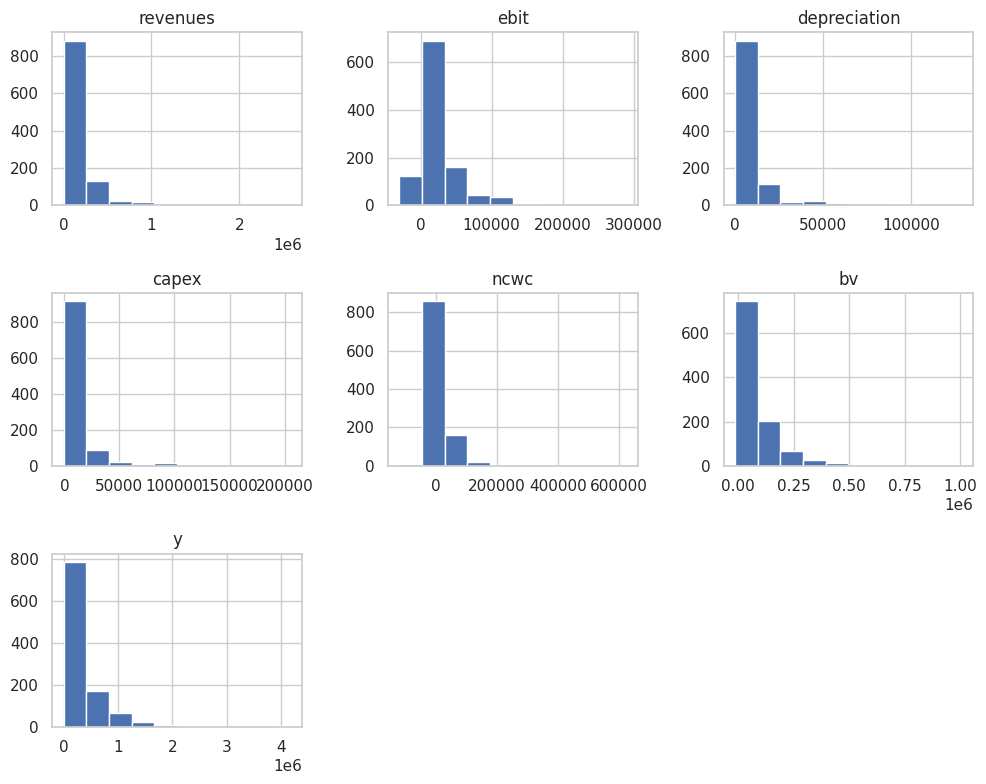

In [6]:

display(df.describe())

df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

### Preguntas de Reflexión (Exploración)
1. ¿Qué tipo de problema estás intentando resolver al usar `y` como variable objetivo?
2. ¿Notas valores atípicos (outliers) en alguna de las variables? ¿Cómo podría afectar a la regresión lineal?
3. ¿Crees que la columna `valuationdate` podría aportar información para predecir `y`, o la excluirías del análisis?

_Responde con tu razonamiento propio aquí._

1. se esta resolviendo un problema de regresión, ya que se quiere predecir un valor numerico.

2. si hay valores atipicos, esto puede dañar el modelo porque la regresión es muy sensible y esos valores extremos pueden jalar la recta y dar resultados menos preciso.

3. no sirve ya que solo tine la fecha y no aporta muhco valor, pero si se convierte en años o meses puede servir


## Paso 2: Preparación y Limpieza de Datos

1. **Manejo de valores faltantes**.
2. **Posible eliminación** o **imputación** de outliers.
3. **Transformaciones** (escalado, log, etc.) si son necesarias.

In [7]:
print("Valores nulos por columna:\n", df.isnull().sum())

Valores nulos por columna:
 valuationdate    0
revenues         0
ebit             0
depreciation     0
capex            0
ncwc             0
bv               0
y                0
dtype: int64


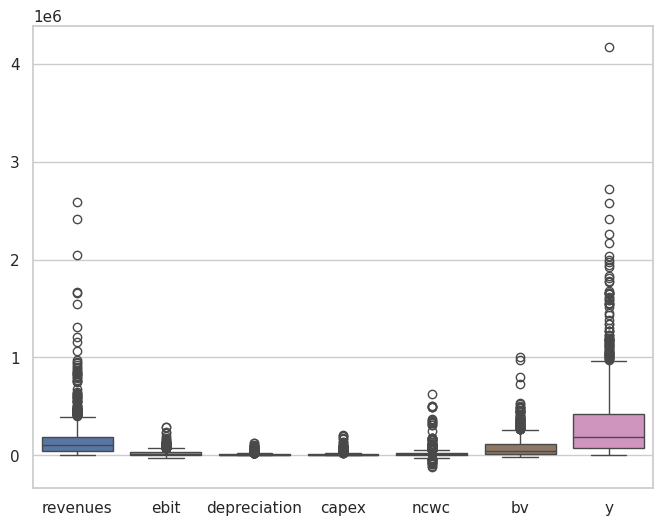

In [8]:
sns.boxplot(data=df)
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('y')

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

display(df.head())

,valuationdate,revenues,ebit,depreciation,capex,ncwc,bv,y
0,30/06/2011,-0.347083,-0.429711,-0.113238,-0.368042,-0.100259,-0.312812,91760.80000
1,31/12/2010,-0.354840,-0.315332,0.047262,0.306845,-0.187308,-0.131995,184461.70000
2,30/09/2016,-0.667120,-0.748839,-0.529444,-0.504522,-0.381898,-0.675382,23323.68520
3,30/09/2018,-0.457665,-0.518729,-0.445825,-0.408017,-0.191371,-0.512237,130202.79240
4,30/09/2014,-0.732244,-0.740182,-0.559333,-0.464829,-0.406041,-0.758466,11472.12267


### Pregunta de Reflexión (Limpieza)
¿Por qué es relevante tratar valores faltantes y/o outliers **antes** de entrenar el modelo de regresión lineal?

_Responde con tu razonamiento aquí._

es relevante porque los valores faltantes pueden dar errores o sesgar el analisis, y los outliers hacen que la recta de regresion se devie y se pierda la precision

## Paso 4: Selección de Variables e Implementación del Modelo

1. **Seleccionar** cuáles columnas usarás como variables explicativas (features). Puede que uses todas o hagas una selección.
2. **Asignar** `X` (features) y `y` (variable objetivo).
3. **Dividir** en conjunto de entrenamiento (train) y conjunto de prueba (test).

In [12]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
features = [col for col in numerical_cols if col != 'y']

X = df[features]
y = df['y']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"entrenamiento:{X_train.shape[0]} muestras")
print(f"prueba: {X_test.shape[0]} muestras")

entrenamiento:848 muestras
prueba: 213 muestras


### Preguntas de Reflexión (Selección de Variables)
1. ¿Por qué es importante separar los datos en train y test?
2. ¿Qué pasaría si entrenas y evalúas en el **mismo** conjunto de datos?

_Responde con tu razonamiento._

1. Separar en train y test es importante porque así el modelo aprende con una parte de los datos y luego se prueba con otros nuevos, para ver qué tan bien generaliza.
2. si entreno y evaluo con los mismo datos, el modelo podra momorizar y dar un resultado adecuado

## Paso 5: Entrenar el Modelo de Regresión Lineal
Usaremos la clase `LinearRegression` de scikit-learn.

In [13]:
model = LinearRegression()

model.fit(X_train, y_train)



LinearRegression()

In [14]:
intercept = model.intercept_
coef= model.coef_[0]


print(f"Intercept (beta_0): {intercept:.2f}")
print(f"Coeficiente (beta_1): {coef:.2f}")

Intercept (beta_0): 329433.91
Coeficiente (beta_1): 8070.84


### Interpretación de Coeficientes
Si la lista de features es `["revenues", "ebit", "depreciation", "capex", "ncwc", "bv"]` y tu `model.coef_` es algo como `[a, b, c, d, e, f]`, entonces:

\[ y \approx \beta_0 + a\cdot revenues + b\cdot ebit + c\cdot depreciation + d\cdot capex + e\cdot ncwc + f\cdot bv \]

Cada coeficiente indica cómo cambia `y` en promedio **por cada unidad** que se incrementa la variable (manteniendo las demás constantes).

## Paso 6: Evaluación y Validación del Modelo
Usaremos las siguientes métricas:
- **MSE (Mean Squared Error)**
- **MAE (Mean Absolute Error)**
- **R² (Coeficiente de Determinación)**

In [15]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)


mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)


print("Conjunto de Entrenamiento:")
print(f"MSE: {mse_train:.2f}")
print(f"MAE: {mae_train:.2f}")
print(f"R^2: {r2_train:.2f}")
print("\nConjunto de Prueba:")
print(f"MSE: {mse_test:.2f}")
print(f"MAE: {mae_test:.2f}")
print(f"R^2: {r2_test:.2f}")

Conjunto de Entrenamiento:
MSE: 48970552583.39
MAE: 125648.97
R^2: 0.68

Conjunto de Prueba:
MSE: 107778655517.24
MAE: 147089.68
R^2: 0.50


### Preguntas de Reflexión (Evaluación)
1. ¿Por qué comparamos las métricas en **Entrenamiento** vs **Prueba**?
2. ¿Qué significa si el error en entrenamiento es **muy** distinto (mucho menor o mucho mayor) que en prueba?
3. ¿Cómo interpretar un **R²** cercano a 1, cercano a 0 o incluso negativo?

_Responde con tu razonamiento._

1. Comparamos las métricas en entrenamiento y prueba para ver si el modelo está aprendiendo bien y también si generaliza a datos nuevos.

2. Si el error en entrenamiento es mucho menor que en prueba, el modelo está sobreajustado (se aprendió de memoria). Si es mucho mayor, está subajustado (no aprendió lo suficiente).

3. Un R² cercano a 1 significa que el modelo explica casi toda la variabilidad de los datos, cercano a 0 que explica muy poco, y negativo que el modelo predice peor que una línea horizontal con el promedio.

### Pregunta de Reflexión (Residuos)
Si observas un patrón claro en la gráfica de residuos (por ejemplo, forma de U), ¿qué podría indicar respecto a las **asunciones** de la regresión lineal?

_Responde con tu razonamiento._

*Responde con tu razonamiento aquí.*

Si observas un patrón claro en la gráfica de residuos, como una forma de "U" o embudo, esto podría indicar que una o más de las **asunciones de la regresión lineal** no se cumplen. Específicamente, podría sugerir:

1.  No linealidad**: La relación entre las variables predictoras y la variable objetivo no es lineal. El modelo lineal no está capturando la verdadera forma de la relación.
2.  Heterocedasticidad**: La varianza de los residuos no es constante en todos los niveles de las variables predictoras. Esto significa que el error del modelo es mayor para algunos rangos de valores que para otros.
3.  Residuos no independientes**: Podría haber alguna dependencia o autocorrelación entre los residuos, lo cual es otra asunción violada.


## Paso 8: Interpretación y Conclusiones

1. **Revisa** los coeficientes: ¿son consistentes con la lógica de negocio? (p.ej., si `ebit` aumenta, esperas que `y` aumente o disminuya?).
2. **Observa** el nivel de error y R²: ¿el modelo es suficientemente bueno para su uso práctico?
3. **Considera** la posibilidad de:
   - Añadir más variables.
   - Aplicar **regresiones polinómicas** (X², X³) si sospechas no linealidad.
   - Usar **regularización** (Ridge, Lasso) si hay multicolinealidad o se requieren coeficientes más estables.

1. Los coeficientes hay que ver si tienen sentido con la lógica del negocio. Por ejemplo, si el ebit sube, lo normal es que la variable objetivo (y) también suba. Si el signo va al revés, toca revisar.

2. Con el nivel de error y el R² miro si el modelo es útil en la práctica. Un R² alto y error bajo son buenas señales; si no, el modelo no es tan confiable.

3. Para mejorar, se puede:

Meter más variables que aporten información.

Probar regresiones polinómicas si la relación no es lineal.

Usar regularización (Ridge o Lasso) si hay problemas de multicolinealidad o quiero coeficientes más estables.

### Preguntas de Reflexión Final
1. ¿Crees que la Regresión Lineal Simple/Múltiple **captura adecuadamente** las relaciones en tus datos?
2. ¿Qué otras técnicas (ej. árboles de decisión, bosques aleatorios, etc.) considerarías para comparar resultados?
3. ¿El dataset es suficientemente grande y variado para hacer conclusiones robustas?

_Responde con tu razonamiento._

*Responde con tu razonamiento.*

1.  Considerando el R² de 0.50 en el conjunto de prueba, parece que la regresión lineal múltiple **no captura adecuadamente** todas las relaciones en los datos. Un R² de 0.50 indica que el modelo solo explica el 50% de la variabilidad en la variable objetivo `y`. Esto sugiere que hay factores o relaciones no lineales que el modelo lineal no está considerando.

2.  Para comparar resultados y potencialmente obtener un mejor rendimiento, consideraría otras técnicas que pueden capturar relaciones no lineales y interacciones entre variables de manera más efectiva. Algunas opciones serían:
    *   **Árboles de Decisión y Bosques Aleatorios (Random Forests)**: Son buenos para manejar relaciones complejas y no se ven tan afectados por outliers.
    *   **Gradient Boosting Machines (como XGBoost o LightGBM)**: Suelen dar resultados muy precisos.
    *   **Modelos Polinómicos**: Si la relación parece no lineal pero con una forma específica (cuadrática, cúbica, etc.).

3.  El dataset tiene 1061 muestras, lo cual no es extremadamente grande pero tampoco pequeño. Puede ser suficiente para obtener conclusiones iniciales, pero la variabilidad de los datos (observando los histogramas y boxplots) sugiere que hay outliers y distribuciones sesgadas. Esto, junto con el R² moderado, indica que para conclusiones **realmente robustas** o para modelos de muy alta precisión, un dataset más grande y/o con una distribución más uniforme de los valores (o un tratamiento más agresivo de outliers) podría ser beneficioso.

## Resumen
En este Notebook hemos:
1. **Explorado** los datos (EDA) y detectado posibles outliers.
2. **Limpieza** de datos y transformaciones opcionales.
3. **Seleccionado** variables y dividido en train/test.
4. **Entrenado** un modelo de Regresión Lineal.
5. **Evaluado** con MSE, MAE, R² y analizado residuos.
6. **Reflexionado** sobre los coeficientes y conclusiones.

¡Has completado un **análisis de regresión lineal** de forma integral! Para afianzar, puedes:
- Ajustar parámetros (aunque la regresión lineal simple en sklearn no tiene muchos).
- Comparar con otros modelos.
- Realizar validación cruzada en lugar de una simple división train/test.

¡Éxitos en tu proyecto de análisis!